In [124]:
import pandas as pd 
import numpy as np 
import os
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [125]:
data = pd.read_csv("C:\\Users\\prasa\\Downloads\\parkinsons.data")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [126]:
features = data.loc[:, data.columns != 'status'].values[:, 1:]
labels = data.loc[:, 'status'].values

In [127]:
labels[labels == 1].shape[0], labels[labels == 0].shape[0]

(147, 48)

In [128]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(features)
Y = labels

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.14, random_state=7)

In [131]:
# Train
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [118]:
# Evaluate
Y_hat = [round(yhat) for yhat in model.predict(X_test)]
print("Accuracy is",accuracy_score(Y_test, Y_hat)) # Test set accuracy
Y_hat = [round(yhat) for yhat in model.predict(X)]
print("Full test Accuracy", accuracy_score(Y, Y_hat)) # Full set accuracy

Accuracy is 0.9285714285714286
Full test Accuracy 0.9897435897435898


Classification error is 0.01025641025641022


<BarContainer object of 2 artists>

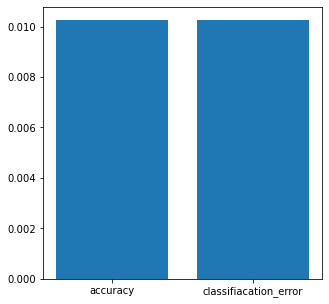

In [136]:
#classification error
accuracy = accuracy_score(Y, Y_hat)
classification_error = 1- accuracy_score(Y, Y_hat, normalize = True)
print("Classification error is", classification_error)

results =[]
results.append(classification_error)

list2 = ["accuracy" , "classifiacation_error"]
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5, 5))
plt.bar(list2 , results )

In [94]:
rs = pd.read_csv('C:\\Users\prasa\Downloads\\parkinsons_updrs.data')
rs.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [95]:
features = rs.loc[:, (rs.columns != 'motor_UPDRS') & (rs.columns != 'total_UPDRS')].values[:, 1:]
labels = rs.loc[:, (rs.columns == 'motor_UPDRS') | (rs.columns == 'total_UPDRS')].values

In [96]:
X = scaler.fit_transform(features)
Y = scaler.fit_transform(labels)

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=7)

In [98]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [99]:
u_model = Sequential()
u_model.add(Dense(32, input_shape=(X.shape[1],)))
u_model.add(Dense(16, activation='tanh'))
u_model.add(Dense(8, activation='tanh'))
u_model.add(Dense(72, activation='tanh'))
u_model.add(Dense(Y.shape[1], activation='tanh'))
u_model.compile(optimizer='sgd', loss='mean_squared_error')
u_model.fit(X_train, Y_train, batch_size=1, epochs=5, validation_split=0.25, shuffle=True)

Epoch 1/5
3965/3965 [==============================] - 6s 1ms/step - loss: 0.1992 - val_loss: 0.1870
Epoch 2/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1828 - val_loss: 0.1814
Epoch 3/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1719 - val_loss: 0.1674
Epoch 4/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1556 - val_loss: 0.1444
Epoch 5/5
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1448 - val_loss: 0.1580


In [100]:
u_model.fit(X_train, Y_train, batch_size=1, epochs=15, validation_split=0.25, shuffle=True)

Epoch 1/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1400 - val_loss: 0.1424
Epoch 2/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1324 - val_loss: 0.1252
Epoch 3/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1285 - val_loss: 0.1575
Epoch 4/15
3965/3965 [==============================] - 4s 1ms/step - loss: 0.1219 - val_loss: 0.1243
Epoch 5/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1209 - val_loss: 0.1161
Epoch 6/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1165 - val_loss: 0.1163
Epoch 7/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1145 - val_loss: 0.1134
Epoch 8/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1120 - val_loss: 0.1045
Epoch 9/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.1092 - val_loss: 0.1107
Epoch 10/15
3965/3965 [==============================] - 5s 1ms/step - loss: 0.107

In [101]:
u_model.fit(X_train, Y_train, batch_size=1, epochs=75, validation_split=0.25, shuffle=True)

Epoch 1/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0958 - val_loss: 0.1389
Epoch 2/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0960 - val_loss: 0.0913
Epoch 3/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0940 - val_loss: 0.1032
Epoch 4/75
3965/3965 [==============================] - 6s 1ms/step - loss: 0.0935 - val_loss: 0.0977
Epoch 5/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0925 - val_loss: 0.0978
Epoch 6/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0903 - val_loss: 0.1051
Epoch 7/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0892 - val_loss: 0.0958
Epoch 8/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0889 - val_loss: 0.0896
Epoch 9/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.0862 - val_loss: 0.0976
Epoch 10/75
3965/3965 [==============================] - 5s 1ms/step - loss: 0.086

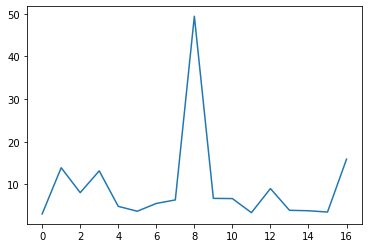

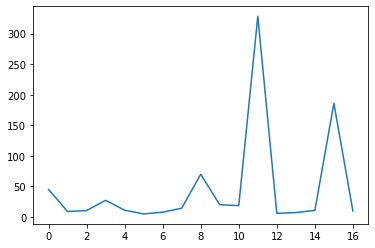

In [103]:
Y_hat = u_model.predict(X_test)
error = np.abs((Y_hat - Y_test) / Y_test)
plt.show(plt.plot(error[:, 0][error[:, 0] > 3]))
plt.show(plt.plot(error[:, 1][error[:, 1] > 5]))

INFO:tensorflow:Assets written to: u_model.hd5\assets
